# Vehicle Loan Machine Learning Model
### Data Cleaning and Exploratory Data Analysis 

$Author$ ~ Mugangasia Bravin

In [1]:
# Importing LIbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the dataset
loan_df = pd.read_csv('/home/bravin/Documents/Loan Default Prediction Model/vehicle_loans.csv', index_col="UNIQUEID")

# Reading the first 5 rows of the dataset
loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
# Checking the shape of the dataset
loan_df.shape

(233154, 40)

* The DataFrame has 233154 data points with 40 Variables 

In [4]:
# Checking the datatypes of the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   DATE_OF_BIRTH                        233154 non-null  object 
 8   EMPLOYMENT_TYPE                      225493 non-null  object 
 9   DISBURSAL_DATE                       233154 non-null  object 
 10  STATE_ID                             233154 non-null  int64  
 11  EMPLOYEE

1. OUr columns are made up of three dataTypes;
    * Integer ```int64``` (Whole Numbers)
    * Float ```float64``` (floating point NUmbers)
    * object ```string``` (Non Numeric)
2. DATE_OF_BIRTH, EMPLOYMENT_TYPE,DISBURSAL_DATE,PERFORM_CNS_SCORE_DESCRIPTION,AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGHT are object data types. 
3. EMPLOYMENT_TYPE has some missing values 

### FEATURES ENGINEERING & DATA CLEANING

#### Date Range 

In [5]:
# Converting disbursed date to datetime format
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

In [6]:
# Checking the first and last disbursed date
print("Minimum Disbursal Date :",loan_df['DISBURSAL_DATE'].min())
print("Maximum Disbursal Date :",loan_df['DISBURSAL_DATE'].max())

Minimum Disbursal Date : 2018-01-08 00:00:00
Maximum Disbursal Date : 2018-12-10 00:00:00


In [7]:
# print timespan of the dataset
print("Timespan of the dataset :",loan_df['DISBURSAL_DATE'].max() - loan_df['DISBURSAL_DATE'].min())

Timespan of the dataset : 336 days 00:00:00


* The Dataset has information for 233154 loan details.
* There are 40 Variables 
* The data covers loans over 336 days between January and December 2018

#### Missing Values 

In [8]:
# identifying the missing values
loan_df.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64


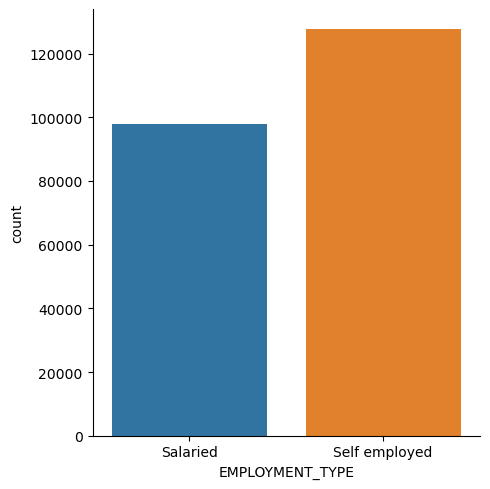

In [9]:
# Explore the EMPLOYMENT_TYPE column
print(loan_df['EMPLOYMENT_TYPE'].value_counts())

# catplot of EMPLOYMENT_TYPE
sns.catplot(x='EMPLOYMENT_TYPE', kind='count', data=loan_df)

* ```EMPLOYMENT_TYPE``` has two unique variables ```Salaried``` and ```Self employed```

In [10]:
# Fill the missing values in EMPLOYMENT_TYPE with 'Missing'
loan_df['EMPLOYMENT_TYPE'].fillna('Missing', inplace=True)

In [11]:
# Explore the EMPLOYMENT_TYPE column
loan_df['EMPLOYMENT_TYPE'].value_counts()

Self employed    127635
Salaried          97858
Missing            7661
Name: EMPLOYMENT_TYPE, dtype: int64

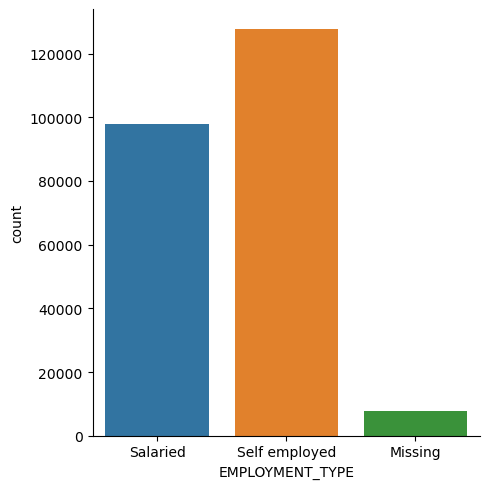

In [12]:
# catplot of EMPLOYMENT_TYPE
sns.catplot(x='EMPLOYMENT_TYPE', kind='count', data=loan_df)

* All 7661 values have been filled with the value ```Missing``` 

#### Explore Target Variable - *LOAN_DEFAULT*

In [13]:
# explore target variable
loan_df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [14]:
# # ENCODING TARGET VARIABLE
# loan_df['LOAN_DEFAULT'] = loan_df['LOAN_DEFAULT'].map({0:'NO', 1:'YES'})

In [15]:
# Checking the percentage of target variable
loan_df['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64

<AxesSubplot:xlabel='LOAN_DEFAULT', ylabel='count'>

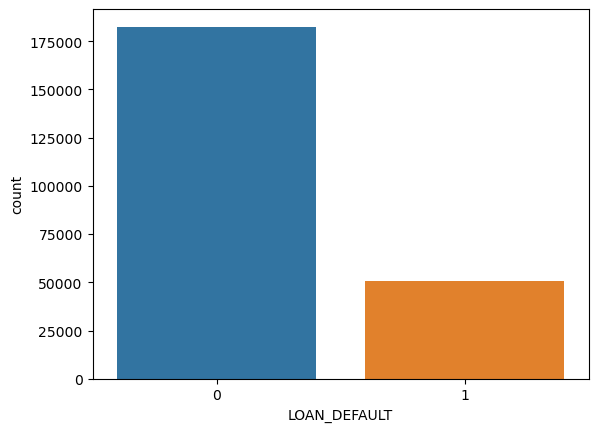

In [16]:
# Bar plot of target variable
sns.countplot(loan_df['LOAN_DEFAULT'])

* ```50611```applicants defaulted on payments while ```182543``` applicants succesfully made paymenst for their loans 
* The rate of defaulted loans is about ```21.7%```

#### Dates 

In [17]:
# DISBURSAL_DATE and DATE_OF_BIRTH
loan_df[['DISBURSAL_DATE','DATE_OF_BIRTH']].head(10)

,DISBURSAL_DATE,DATE_OF_BIRTH
UNIQUEID,,
420825,2018-03-08,01-01-1984
537409,2018-09-26,31-07-1985
417566,2018-01-08,24-08-1985
624493,2018-10-26,30-12-1993
539055,2018-09-26,09-12-1977
518279,2018-09-19,08-09-1990
529269,2018-09-23,01-06-1988
510278,2018-09-16,04-10-1989
490213,2018-05-09,15-11-1991


#### Age of Customer at time of Disbursment 

In [18]:
# Convert DATE_OF_BIRTH to datetime format
loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])

# Convert DISBURSAL_DATE to datetime format
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])


# Calculate the age of the customer at time of loan disbursal
loan_df['AGE'] = loan_df['DISBURSAL_DATE'].dt.year - loan_df['DATE_OF_BIRTH'].dt.year

# Checking the first 5 rows of the dataset
loan_df[['DISBURSAL_DATE','DATE_OF_BIRTH','AGE']].head()

,DISBURSAL_DATE,DATE_OF_BIRTH,AGE
UNIQUEID,,,
420825,2018-03-08,1984-01-01,34
537409,2018-09-26,1985-07-31,33
417566,2018-01-08,1985-08-24,33
624493,2018-10-26,1993-12-30,25
539055,2018-09-26,1977-09-12,41


#### Disbursal Dates Vs Defaults 

In [19]:
# Disbursal Month "DISBURSAL_MONTH"
loan_df['DISBURSAL_MONTH'] = loan_df['DISBURSAL_DATE'].dt.month

loan_df[['DISBURSAL_DATE','DISBURSAL_MONTH']].head()

,DISBURSAL_DATE,DISBURSAL_MONTH
UNIQUEID,,
420825,2018-03-08,3
537409,2018-09-26,9
417566,2018-01-08,1
624493,2018-10-26,10
539055,2018-09-26,9


<AxesSubplot:xlabel='DISBURSAL_MONTH', ylabel='count'>

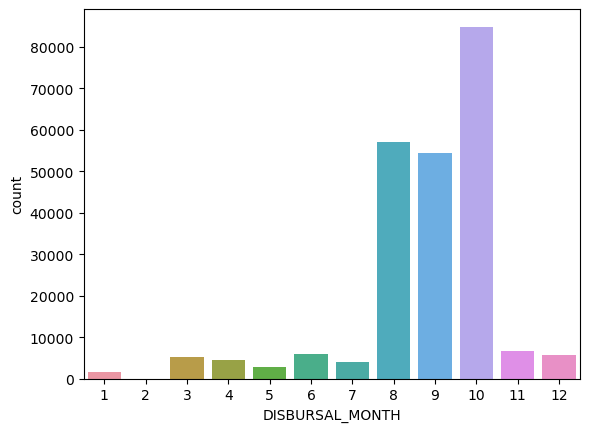

In [20]:
# Distribution of loan applications by month
loan_df['DISBURSAL_MONTH'].value_counts()

# Bar plot of loan applications by month
sns.countplot(loan_df['DISBURSAL_MONTH'])

* The distribution of loan applications accross the different months is uneven 

In [21]:
# drop columns
loan_df.drop(['DISBURSAL_DATE','DATE_OF_BIRTH'], axis=1, inplace=True)

#### CREDIT - *CREDIT_HISTORY_LENGTH" and "AVG_ACCT_AGE*

In [22]:
# "CREDIT_HISTORY_LENGTH" and "AVG_ACCT_AGE"
loan_df[['CREDIT_HISTORY_LENGTH','AVERAGE_ACCT_AGE']].head()

,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE
UNIQUEID,,
420825,0yrs 0mon,0yrs 0mon
537409,1yrs 11mon,1yrs 11mon
417566,0yrs 0mon,0yrs 0mon
624493,1yrs 3mon,0yrs 8mon
539055,0yrs 0mon,0yrs 0mon


In [23]:
# New Column "AVERAGE_ACCT_AGE_IN_MONTHS"
loan_df['AVERAGE_ACCT_AGE_IN_MONTHS'] = loan_df['AVERAGE_ACCT_AGE'].apply(lambda x: int(x.split(' ')[0].split('yrs')[0])*12 + int(x.split(' ')[1].split('mon')[0]))

# New Column "CREDIT_HISTORY_LENGTH_IN_MONTHS"
loan_df['CREDIT_HISTORY_LENGTH_IN_MONTHS'] = loan_df['CREDIT_HISTORY_LENGTH'].apply(lambda x: int(x.split(' ')[0].split('yrs')[0])*12 + int(x.split(' ')[1].split('mon')[0]))

# Checking the first 5 rows of the dataset
loan_df[['CREDIT_HISTORY_LENGTH','AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH_IN_MONTHS','AVERAGE_ACCT_AGE_IN_MONTHS']].head()

,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH_IN_MONTHS,AVERAGE_ACCT_AGE_IN_MONTHS
UNIQUEID,,,,
420825,0yrs 0mon,0yrs 0mon,0,0
537409,1yrs 11mon,1yrs 11mon,23,23
417566,0yrs 0mon,0yrs 0mon,0,0
624493,1yrs 3mon,0yrs 8mon,15,8
539055,0yrs 0mon,0yrs 0mon,0,0


In [24]:
# Creating Function to convert "CREDIT_HISTORY_LENGTH" and "AVG_ACCT_AGE" to months
def calc_months(str_list):
    years = int(str_list[0].split('yrs')[0])
    months = int(str_list[1].split('mon')[0])
    total_months = years*12 + months
    return total_months

loan_df['AVERAGE_ACCT_AGE_IN_MONTHS'] = loan_df['AVERAGE_ACCT_AGE'].str.split(' ').apply(calc_months)

In [25]:
# drop columns
loan_df.drop(['CREDIT_HISTORY_LENGTH','AVERAGE_ACCT_AGE'], axis=1, inplace=True)

In [26]:
loan_df["PERFORM_CNS_SCORE_DESCRIPTION"].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [27]:
# save cleaned dataset
# loan_df.to_csv('/home/bravin/Documents/Loan Default Prediction Model/vehicle_loans_cleaned.csv')

# Exploratory Data Analysis

In [28]:
# load cleaned dataset
loan_df_cleaned  = pd.read_csv('/home/bravin/Documents/Loan Default Prediction Model/vehicle_loans_cleaned.csv', index_col="UNIQUEID")

# Checking the first 5 rows of the dataset
loan_df_cleaned.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,EMPLOYEE_CODE_ID,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_IN_MONTHS,CREDIT_HISTORY_LENGTH_IN_MONTHS
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,...,0,0,0,0,0,NO,34,3,0,0
537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,...,1991,0,0,1,0,YES,33,9,23,23
417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,...,0,0,0,0,0,NO,33,1,0,0
624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,...,31,0,0,0,1,YES,25,10,8,15
539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,...,0,0,0,0,1,YES,41,9,0,0


In [29]:
# Checking info of the dataset
loan_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   EMPLOYMENT_TYPE                      233154 non-null  object 
 8   STATE_ID                             233154 non-null  int64  
 9   EMPLOYEE_CODE_ID                     233154 non-null  int64  
 10  MOBILENO_AVL_FLAG                    233154 non-null  int64  
 11  AADHAR_F

In [30]:
# investingating unique values in the dataset
loan_df_cleaned.nunique()

DISBURSED_AMOUNT                       24565
ASSET_COST                             46252
LTV                                     6579
BRANCH_ID                                 82
SUPPLIER_ID                             2953
MANUFACTURER_ID                           11
CURRENT_PINCODE_ID                      6698
EMPLOYMENT_TYPE                            3
STATE_ID                                  22
EMPLOYEE_CODE_ID                        3270
MOBILENO_AVL_FLAG                          1
AADHAR_FLAG                                2
PAN_FLAG                                   2
VOTERID_FLAG                               2
DRIVING_FLAG                               2
PASSPORT_FLAG                              2
PERFORM_CNS_SCORE                        573
PERFORM_CNS_SCORE_DESCRIPTION             20
PRI_NO_OF_ACCTS                          108
PRI_ACTIVE_ACCTS                          40
PRI_OVERDUE_ACCTS                         22
PRI_CURRENT_BALANCE                    71341
PRI_SANCTI

In [31]:
# cheking mobileno_avl_flag column
loan_df_cleaned['MOBILENO_AVL_FLAG'].value_counts()

1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64

* Every column has ```1``` value 
* Has no predictive value so we can drop it 

In [32]:
# drop MOBILENO_AVL_FLAG column
loan_df_cleaned.drop('MOBILENO_AVL_FLAG', axis=1, inplace=True)

In [33]:
# ID columns
loan_df_cleaned[['SUPPLIER_ID','CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID','BRANCH_ID','STATE_ID',"MANUFACTURER_ID"]].head()


,SUPPLIER_ID,CURRENT_PINCODE_ID,EMPLOYEE_CODE_ID,BRANCH_ID,STATE_ID,MANUFACTURER_ID
UNIQUEID,,,,,,
420825,22807,1441,1998,67,6,45
537409,22807,1502,1998,67,6,45
417566,22807,1497,1998,67,6,45
624493,22807,1501,1998,67,6,45
539055,22807,1495,1998,67,6,45


* Drop the ID Columns since they have no value to our final model and will bring complexities to our final model.

In [34]:
# drop ID columns
loan_df_cleaned.drop(['SUPPLIER_ID','CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID','BRANCH_ID'], axis=1, inplace=True)

# EXPLORING CATEGORICAL VARIABLES 
#### MANUFACTURER_ID

In [35]:
# explore categorical variables
def explore_cat_var(var):
    print(loan_df_cleaned[var].value_counts())
    print("\n")

    print(loan_df_cleaned[var].value_counts(normalize=True))
    sns.countplot(loan_df_cleaned[var])
    plt.show()
    print("\n")

    print(loan_df_cleaned.groupby(var)['LOAN_DEFAULT'].value_counts(normalize=True))
    print("\n")

    print(loan_df_cleaned.groupby(var)['LOAN_DEFAULT'].value_counts(normalize=True).unstack())
    print("\n")
    
    sns.catplot(x=var, hue='LOAN_DEFAULT', kind='count', data=loan_df_cleaned)
    plt.show()

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: MANUFACTURER_ID, dtype: int64


86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


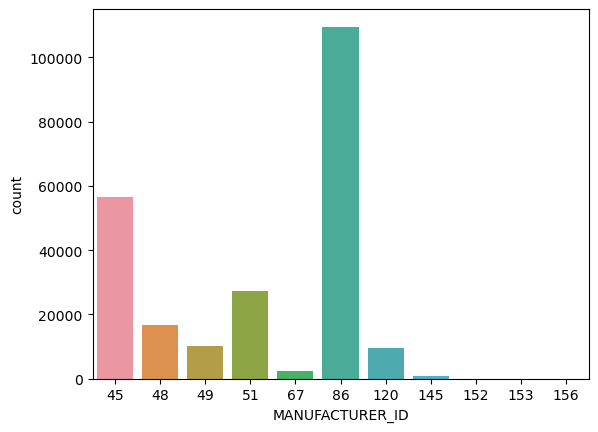



MANUFACTURER_ID  LOAN_DEFAULT
45               NO              0.771501
                 YES             0.228499
48               NO              0.727469
                 YES             0.272531
49               NO              0.781213
                 YES             0.218787
51               NO              0.792053
                 YES             0.207947
67               NO              0.782536
                 YES             0.217464
86               NO              0.795406
                 YES             0.204594
120              NO              0.779250
                 YES             0.220750
145              NO              0.799486
                 YES             0.200514
152              NO              1.000000
153              NO              0.666667
                 YES             0.333333
156              NO              1.000000
Name: LOAN_DEFAULT, dtype: float64


LOAN_DEFAULT           NO       YES
MANUFACTURER_ID                    
45               0.

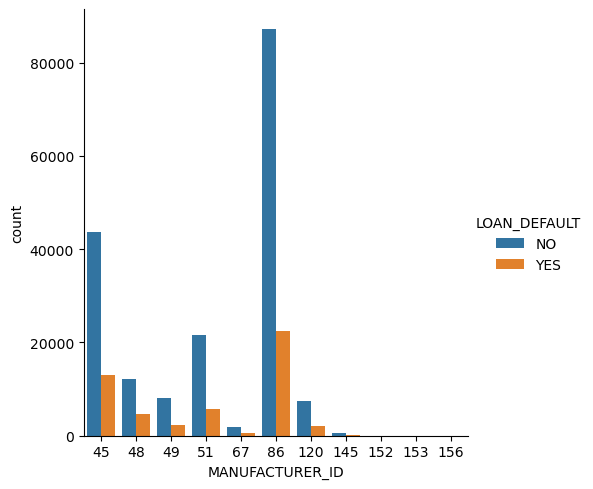

In [36]:
explore_cat_var('MANUFACTURER_ID')

* The MANUFACTURER_ID has ```12``` unique values
* Most Vehicles are bought from MANUFACTURER_ID ```86``` & ```45```

* Loans from manufacturer ```48``` has the highest default rates at ```27.25%```
* The manufacturer with ID ```86``` has the lowest default rate of ```0.12%```
* The manufacturer ```152``` and ```156``` do not have any car loans defaulted 

In [37]:
# checking the EMPLOYMENT_TYPE,PERFORM_CNS_SCORE_DESCRIPTION,STATE_ID,DISBURSAL_MONTH
loan_df_cleaned[['EMPLOYMENT_TYPE','PERFORM_CNS_SCORE_DESCRIPTION','STATE_ID','DISBURSAL_MONTH']].head()

,EMPLOYMENT_TYPE,PERFORM_CNS_SCORE_DESCRIPTION,STATE_ID,DISBURSAL_MONTH
UNIQUEID,,,,
420825,Salaried,No Bureau History Available,6,3
537409,Self employed,I-Medium Risk,6,9
417566,Self employed,No Bureau History Available,6,1
624493,Self employed,L-Very High Risk,6,10
539055,Self employed,No Bureau History Available,6,9


### DISBURSAL_MONTH

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64


10    0.364030
8     0.244366
9     0.233507
11    0.028775
6     0.025695
12    0.024074
3     0.022080
4     0.019845
7     0.017799
5     0.012395
1     0.007326
2     0.000107
Name: DISBURSAL_MONTH, dtype: float64


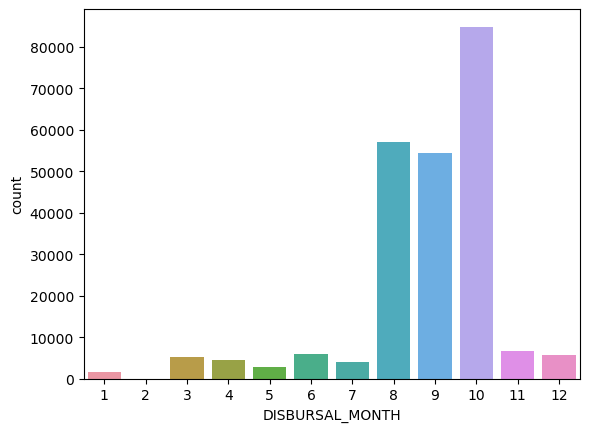



DISBURSAL_MONTH  LOAN_DEFAULT
1                NO              0.770492
                 YES             0.229508
2                NO              0.920000
                 YES             0.080000
3                NO              0.795260
                 YES             0.204740
4                NO              0.785822
                 YES             0.214178
5                NO              0.788581
                 YES             0.211419
6                NO              0.784009
                 YES             0.215991
7                NO              0.776386
                 YES             0.223614
8                NO              0.788732
                 YES             0.211268
9                NO              0.806532
                 YES             0.193468
10               NO              0.759635
                 YES             0.240365
11               NO              0.817409
                 YES             0.182591
12               NO              0.796366
  

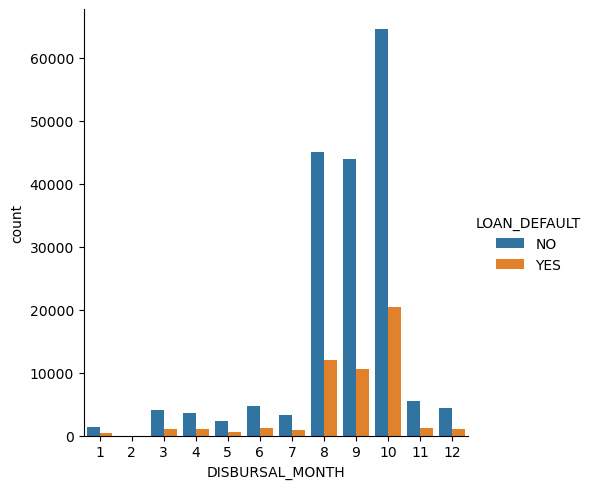

In [38]:
explore_cat_var('DISBURSAL_MONTH')

* The month of disbursal has no impact on the loan default
* The month of disbursal is not a good predictor for the loan default
* Loans Disbursed in October have the highest default rate at ```24%```
* Mjority of the loans were disbursed in ```August```, ```September``` and ```October```
* Hence, we can drop the column

### STATE

4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: STATE_ID, dtype: int64


4     0.192448
3     0.146161
6     0.143703
13    0.076705
9     0.068719
8     0.060891
5     0.043649
14    0.040377
1     0.038327
7     0.029105
11    0.028826
18    0.023212
15    0.021655
12    0.018057
2     0.017842
17    0.017117
10    0.015462
16    0.011516
19    0.004439
20    0.000793
21    0.000669
22    0.000326
Name: STATE_ID, dtype: float64


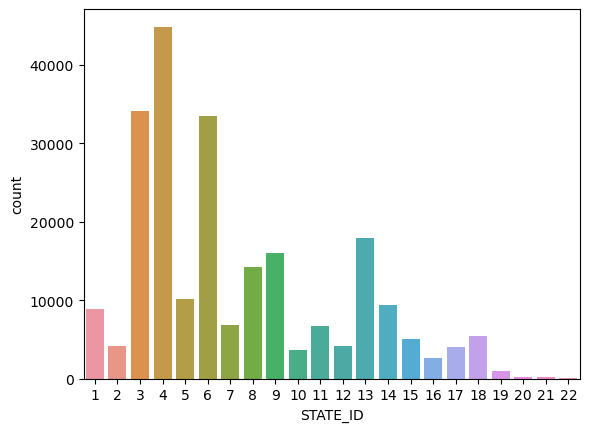



STATE_ID  LOAN_DEFAULT
1         NO              0.822851
          YES             0.177149
2         NO              0.728606
          YES             0.271394
3         NO              0.813809
          YES             0.186191
4         NO              0.792155
          YES             0.207845
5         NO              0.801218
          YES             0.198782
6         NO              0.794359
          YES             0.205641
7         NO              0.798261
          YES             0.201739
8         NO              0.770515
          YES             0.229485
9         NO              0.782050
          YES             0.217950
10        NO              0.824411
          YES             0.175589
11        NO              0.795715
          YES             0.204285
12        NO              0.734442
          YES             0.265558
13        NO              0.693413
          YES             0.306587
14        NO              0.724134
          YES             0.27

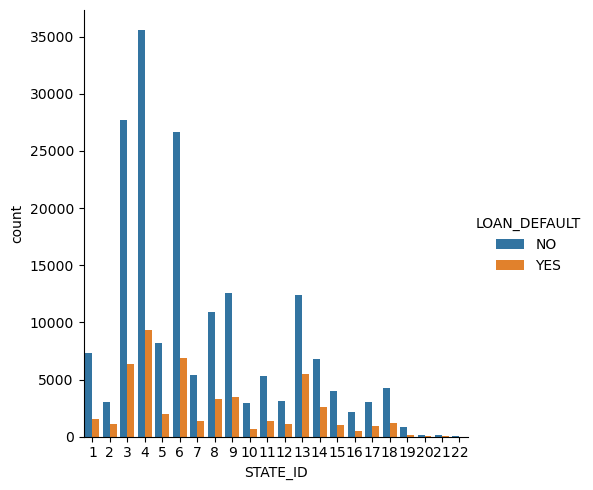

In [39]:
explore_cat_var('STATE_ID')

### PERFORM_CNS_SCORE_DESCRIPTION

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

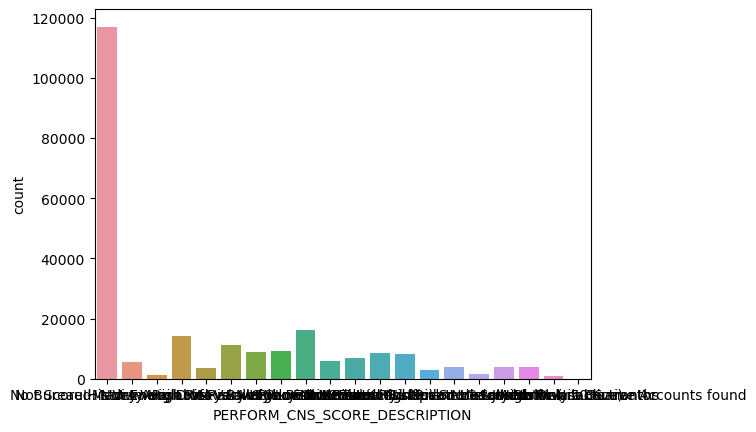



PERFORM_CNS_SCORE_DESCRIPTION                            LOAN_DEFAULT
A-Very Low Risk                                          NO              0.834254
                                                         YES             0.165746
B-Very Low Risk                                          NO              0.868710
                                                         YES             0.131290
C-Very Low Risk                                          NO              0.827361
                                                         YES             0.172639
D-Very Low Risk                                          NO              0.850414
                                                         YES             0.149586
E-Low Risk                                               NO              0.828208
                                                         YES             0.171792
F-Low Risk                                               NO              0.813789
                          

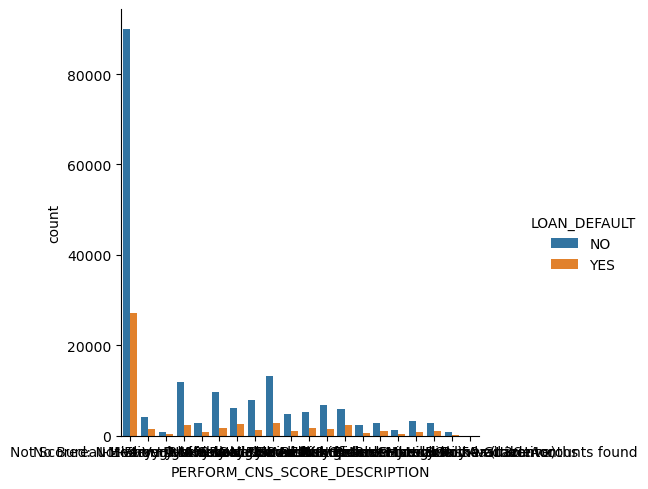

In [40]:
explore_cat_var('PERFORM_CNS_SCORE_DESCRIPTION')

### EMPLOYMENT_TYPE

Self employed    127635
Salaried          97858
Missing            7661
Name: EMPLOYMENT_TYPE, dtype: int64


Self employed    0.547428
Salaried         0.419714
Missing          0.032858
Name: EMPLOYMENT_TYPE, dtype: float64


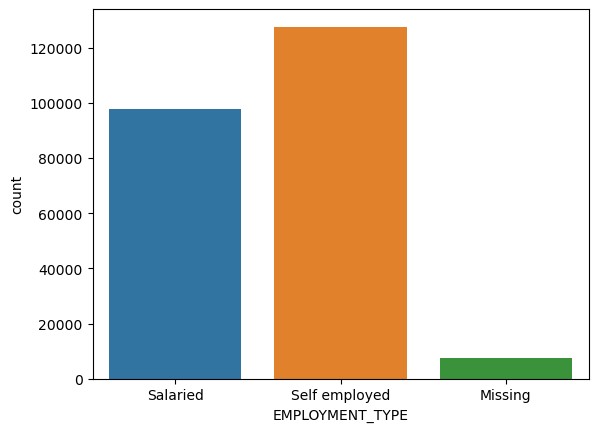



EMPLOYMENT_TYPE  LOAN_DEFAULT
Missing          NO              0.785407
                 YES             0.214593
Salaried         NO              0.796542
                 YES             0.203458
Self employed    NO              0.772343
                 YES             0.227657
Name: LOAN_DEFAULT, dtype: float64


LOAN_DEFAULT           NO       YES
EMPLOYMENT_TYPE                    
Missing          0.785407  0.214593
Salaried         0.796542  0.203458
Self employed    0.772343  0.227657




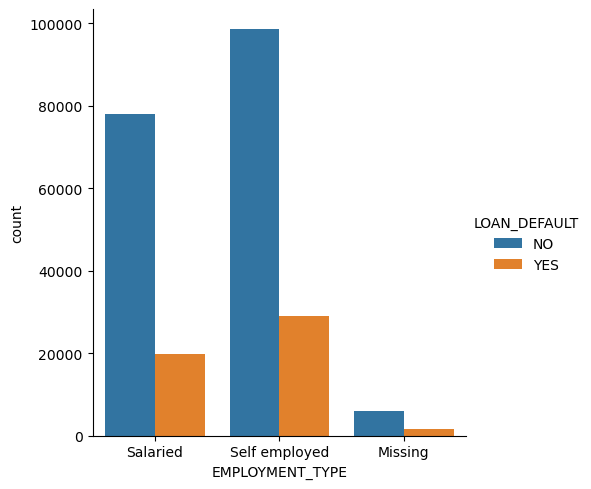

In [41]:
explore_cat_var('EMPLOYMENT_TYPE')

# EXPLORING NUMERICAL VARIABLES 

### AGE

In [42]:
# Function to explore continuous variables
def explore_cont_var(var):
    print(loan_df_cleaned[var].describe())
    print("\n")
    
    sns.boxplot(loan_df_cleaned[var], orient='v', width=0.2, color='pink')
    plt.show()
    print("\n")
    
    sns.distplot(loan_df_cleaned[var],hist=False, color='indigo')
    plt.show()
    print("\n")
    
    sns.boxplot(x='LOAN_DEFAULT', y=var, data=loan_df_cleaned, orient='v', width=0.2, color='pink')
    plt.show()
    print("\n")

23    10584
24    10530
26    10390
22    10211
28    10116
25    10007
27     9385
30     9232
29     8903
31     8633
32     8441
33     7922
21     7489
34     7481
35     7140
36     7018
38     6788
37     6178
40     5883
43     5627
39     5614
42     5581
41     5310
44     4638
45     4466
46     4366
48     4063
47     3721
49     3147
50     3081
51     2522
53     2397
52     2268
20     2188
54     1773
19     1604
55     1556
56     1478
58     1241
57     1173
59      816
18      632
60      621
61      412
62      337
63      169
64       21
69        1
Name: AGE, dtype: int64


23    0.045395
24    0.045163
26    0.044563
22    0.043795
28    0.043388
25    0.042920
27    0.040252
30    0.039596
29    0.038185
31    0.037027
32    0.036204
33    0.033978
21    0.032120
34    0.032086
35    0.030624
36    0.030100
38    0.029114
37    0.026498
40    0.025232
43    0.024134
39    0.024079
42    0.023937
41    0.022775
44    0.019892
45    0.019155
46    0.018726
48    0.

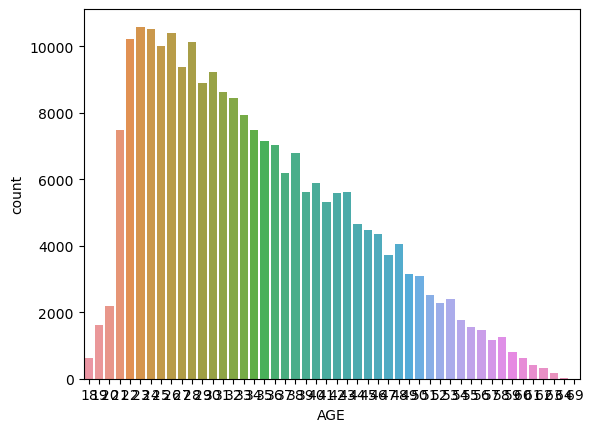



AGE  LOAN_DEFAULT
18   NO              0.732595
     YES             0.267405
19   NO              0.761222
     YES             0.238778
20   NO              0.750457
                       ...   
63   NO              0.869822
     YES             0.130178
64   NO              0.809524
     YES             0.190476
69   NO              1.000000
Name: LOAN_DEFAULT, Length: 95, dtype: float64


LOAN_DEFAULT        NO       YES
AGE                             
18            0.732595  0.267405
19            0.761222  0.238778
20            0.750457  0.249543
21            0.743624  0.256376
22            0.758006  0.241994
23            0.758125  0.241875
24            0.771700  0.228300
25            0.767363  0.232637
26            0.768912  0.231088
27            0.779329  0.220671
28            0.772539  0.227461
29            0.783444  0.216556
30            0.780004  0.219996
31            0.780609  0.219391
32            0.783556  0.216444
33            0.780737  0.219263
34     

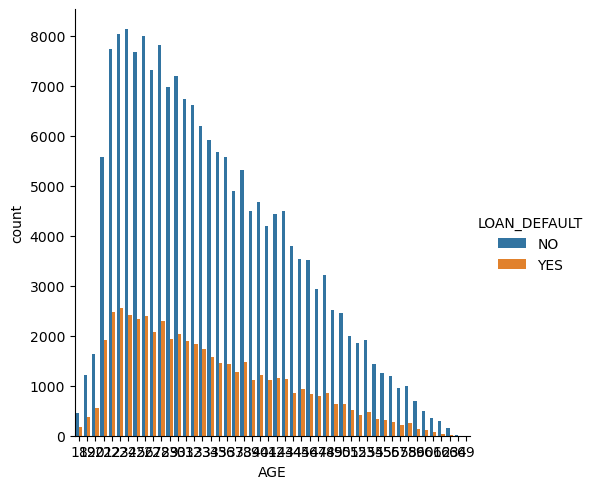

In [43]:
explore_cat_var('AGE')

* The Mean Age is ```34.1```
* The Medium Age is ```32``` 
* Max is far bigger than 3rd Q, probably has a right tail
* Min of ```17``` and Max of ```69```. This are resonable ages and therefore no outliers

<AxesSubplot:xlabel='AGE'>

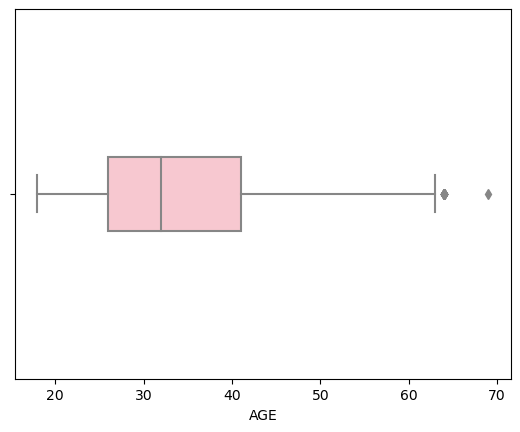

In [44]:
# AGE Boxplot
sns.boxplot(loan_df_cleaned['AGE'], orient='v', width=0.2, color='pink')

* The distribution of AGE within the group of people who defaulted was maginally younger 

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




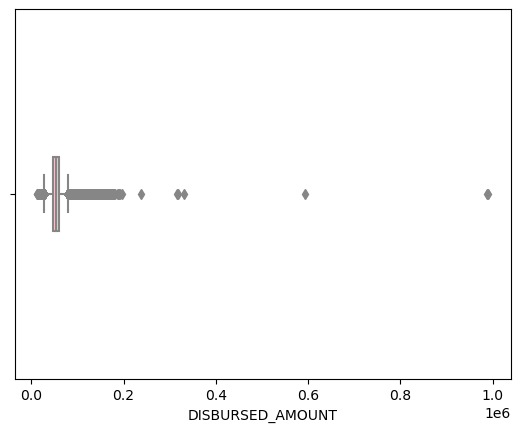

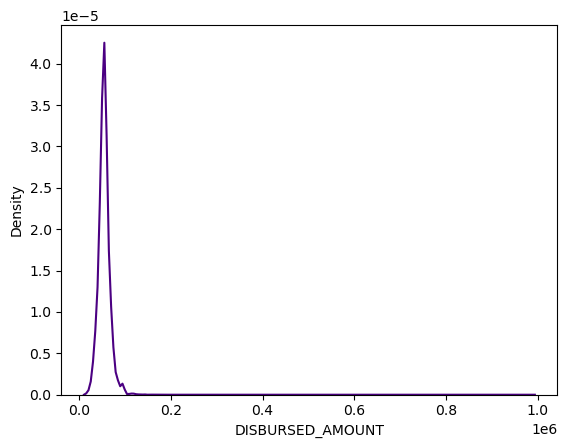

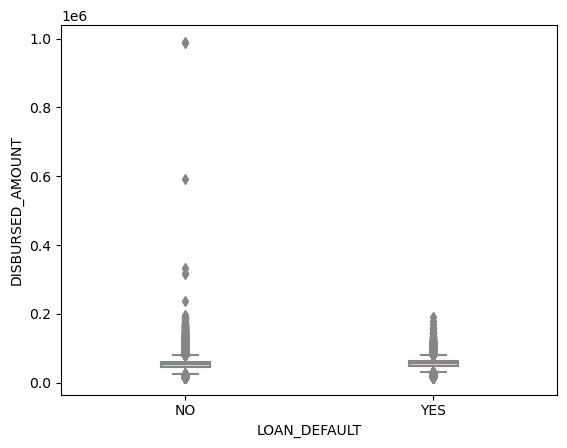

In [45]:
# Explore Disbursed Amount
explore_cont_var('DISBURSED_AMOUNT')

* The average disbursed amount is ```54356.0```
* The median disbursed amount is ```53703.0```
* The minimum disbursed amount is ```13320.0```
* The maximum disbursed amount is ```990572.0```
* The disbursed amount is right skewed
* There are outliers in the disbursed amount
* The disbursed amount for defaulters is higher than that of non-defaulters

### Binary Variables 

1    195924
0     37230
Name: AADHAR_FLAG, dtype: int64


1    0.84032
0    0.15968
Name: AADHAR_FLAG, dtype: float64


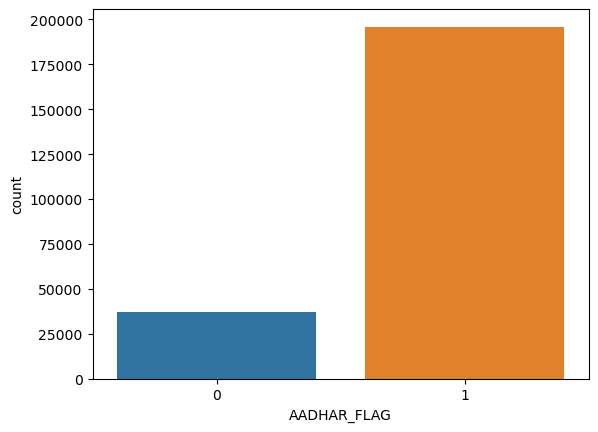



AADHAR_FLAG  LOAN_DEFAULT
0            NO              0.743594
             YES             0.256406
1            NO              0.790403
             YES             0.209597
Name: LOAN_DEFAULT, dtype: float64


LOAN_DEFAULT        NO       YES
AADHAR_FLAG                     
0             0.743594  0.256406
1             0.790403  0.209597




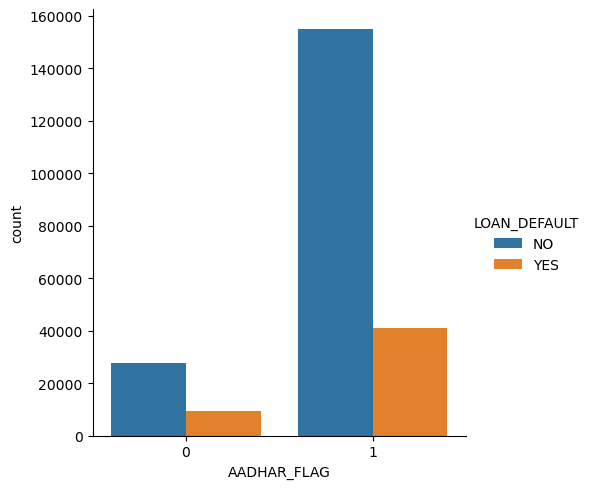

In [46]:
# explore AADHAR_FLAG
explore_cat_var('AADHAR_FLAG')

* Those who provided AADHAR are more likely to default
* Those who did not provide AADHAR are less likely to default
* Those who provided AADHAR are more than those who did not provide AADHAR